In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import sympy as sym

In [2]:
def f(X, n, q, b, c):
    Z = np.zeros(len(X))
    for i in range(len(X)):
        for j in range(int(n)):
            for k in range(int(n)):
                Z[i] += q[j][k]*X[i][j]*X[i][k]
                
        for j in range(int(n)):
            Z[i] += b[j]*X[i][j]    
    return Z

In [3]:
def f_mesh(X, Y, q, b, c):
    Z = np.zeros(len(X))
    Z = q[0][0]*X*X + q[0][1]*X*Y + q[1][0]*Y*X + q[1][1]*Y*Y + b[0]*X + b[1]*Y + c
    return Z

In [4]:
def f2(X, Y, n, q, b, c):
    Z = q[0][0]*X*X + q[0][1]*X*Y + q[1][0]*Y*X + q[1][1]*Y*Y + b[0]*X + b[1]*Y + int(c[0])
    return Z

In [34]:
def adam(X_new, X1, Y1, Z1, n, q, b, c, alpha=0.1, beta1=0.9, beta2=0.99, eps=0.000000001, precision=0.0001, max_iter=200):
    X_old = np.zeros((1, 2))
    X_new = np.zeros((1, 2))
    dfr = np.zeros((1, 2))
    
    X_new[0][0] = 4.9
    X_new[0][1] = 4.9
    i = 0
    Xs = np.zeros((max_iter, 2))
    Ys = np.zeros(max_iter) 
    
    V = np.zeros((max_iter + 1, 2))
    S = np.zeros((max_iter + 1, 2))
    
    V_corr = np.zeros((1, 2))
    S_corr = np.zeros((1, 2))

    x, y = sym.symbols('x y')
    df1 = sym.diff(f2(x, y, n, q, b, c), x)
    df2 = sym.diff(f2(x, y, n, q, b, c), y)

    while np.all(abs(X_new - X_old)) > precision and max_iter > i:
        Xs[i] = X_new
        Ys[i] = f2 (X_new[0][0], X_new[0][1], n, q, b, c)

        X_old = X_new
        
        dfr[0][0] = df1.evalf(subs={x: X_old[0][0], y: X_old[0][1]})
        dfr[0][1] = df2.evalf(subs={x: X_old[0][0], y: X_old[0][1]})
        
        i += 1
        V[i] = beta1 * V[i-1] + (1 - beta1) * dfr # momentum
        S[i] = beta2 * S[i-1] + (1 - beta2) * np.power(dfr, 2) # rmsprop
        
        V_corr = V[i]/(1 - np.power(beta1, i))
        S_corr = S[i]/(1 - np.power(beta2, i))
        
        X_new = X_new - alpha * V_corr / (np.sqrt(S_corr) + eps)
        
        alpha *= 0.99
        # print("V: {}, S:{}, V_corr: {}, S_corr: {}, dfr: {}, X_new: {}".format(V[i], S[i], V_corr, S_corr, dfr, X_new))
        
    print("Finished with {} step".format(i))
    if (i < max_iter):
        Xs[i] = X_new
        Ys[i] = f2(X_new[0][0], X_new[0][1], n, q, b, c)

        for j in range(max_iter - 1, i, -1):
            Xs = np.delete(Xs, j, axis=0)
            Ys = np.delete(Ys, j, axis=0)
    return Xs, Ys
    

In [35]:
X1 = np.arange(-5, 5, 0.1)
Y1 = np.arange(-5, 5, 0.1)
Z1 = np.zeros(len(X1))

X_new = np.zeros((100,2))

for i in range(len(X1)):
    X_new[i][0] = X1[i]
    X_new[i][1] = Y1[i]
    
Z1 = f(X_new, n, q, b, c)

x_list, y_list = adam(X_new, X1, Y1, Z1, n, q, b, c)

X_new:  [[4.8 4.8]]
X_new:  [[4.70105385 4.70105385]]
X_new:  [[4.60318665 4.60318665]]
X_new:  [[4.50642288 4.50642288]]
X_new:  [[4.41078632 4.41078632]]
X_new:  [[4.31629993 4.31629993]]
X_new:  [[4.22298578 4.22298578]]
X_new:  [[4.13086498 4.13086498]]
X_new:  [[4.03995758 4.03995758]]
X_new:  [[3.95028253 3.95028253]]
X_new:  [[3.86185756 3.86185756]]
X_new:  [[3.77469921 3.77469921]]
X_new:  [[3.68882268 3.68882268]]
X_new:  [[3.60424188 3.60424188]]
X_new:  [[3.52096934 3.52096934]]
X_new:  [[3.43901618 3.43901618]]
X_new:  [[3.35839212 3.35839212]]
X_new:  [[3.27910545 3.27910545]]
X_new:  [[3.20116304 3.20116304]]
X_new:  [[3.12457031 3.12457031]]
X_new:  [[3.04933126 3.04933126]]
X_new:  [[2.97544849 2.97544849]]
X_new:  [[2.90292319 2.90292319]]
X_new:  [[2.8317552 2.8317552]]
X_new:  [[2.76194304 2.76194304]]
X_new:  [[2.69348389 2.69348389]]
X_new:  [[2.6263737 2.6263737]]
X_new:  [[2.56060719 2.56060719]]
X_new:  [[2.49617791 2.49617791]]
X_new:  [[2.43307828 2.43307828]

In [9]:
n = input("Enter power of your function: ")
q = []
for i in range(int(n)):
    q.append(input("Enter the function's coefficient matrix q's row q[{}]: ".format(i)).split())
b = input("Enter the function's coefficient b matrix: ").split()
c = input("Enter the function's constant c: ")

for i in range(int(n)):
    q[i] = list(map(float, q[i]))
b = list(map(float, b))
c = list(map(float, c))

Enter power of your function: 2
Enter the function's coefficient matrix q's row q[0]: 1 0
Enter the function's coefficient matrix q's row q[1]: 0 2
Enter the function's coefficient b matrix: 0 0
Enter the function's constant c: 0


Text(0.5, 1.0, 'Minimizing function')

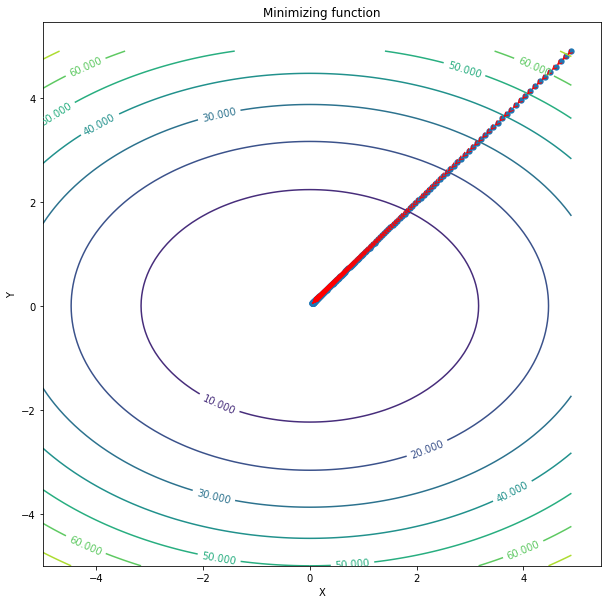

In [36]:
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = f_mesh(X1, Y1, q, b, c)

X, Y = zip(*x_list)
Z = y_list

ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
cs = plt.contour(X1, Y1, Z1)
plt.clabel(cs, inline=1, fontsize=10)
colors = ['b', 'g', 'm', 'c', 'orange']
for j in range(1, len(X)):
    ax[1].annotate('', xy=(X[j], Y[j]), xytext=(X[j-1], Y[j-1]),
                arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                va='center', ha='center')
ax[1].scatter(X, Y, s=40, lw=0)
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('Minimizing function')                      

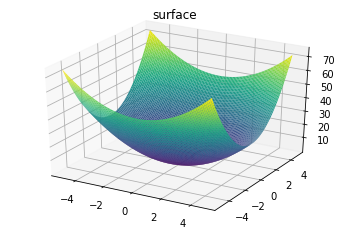

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, Z1, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')
ax.set_title('surface')
plt.show()